In [1]:
from BatchAgglomerate3D import BatchAgglomerate3D
from data_utils import read_data
from metric_utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.width = 0

In [8]:
data = read_data(['mouse'])
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete', 'average', 'single'],
    linkage_region=['homolog_avg'],
    max_region_diff=[1],
    region_dist_scale=np.arange(0.1, 3, 0.01),
    verbose=False
)

agglomerate.agglomerate(data)
all_scores = agglomerate.get_all_scores()

100%|██████████| 870/870 [00:17<00:00, 48.47it/s]


In [3]:
all_scores

,linkage_cell,linkage_region,max_region_diff,region_dist_scale,score metric,score
0,complete,homolog_avg,0,0.20,ME,7.167663
1,complete,homolog_avg,0,0.20,BME,5.342813
2,complete,homolog_avg,0,0.20,MP,8.000000
3,complete,homolog_avg,0,0.13,ME,7.167663
4,complete,homolog_avg,0,0.13,BME,5.342813
...,...,...,...,...,...,...
1735,complete,homolog_avg,1,2.98,BME,4.925282
1736,complete,homolog_avg,1,2.98,MP,14.000000
1737,complete,homolog_avg,1,2.99,ME,11.001096
1738,complete,homolog_avg,1,2.99,BME,4.925282


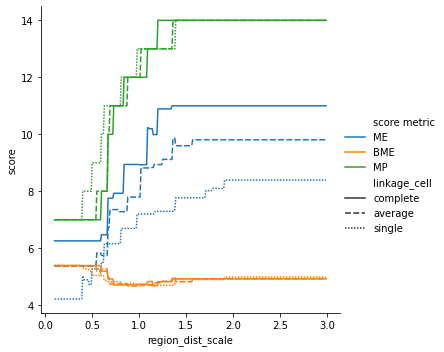

In [9]:
plot = sns.relplot(data=all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='linkage_cell')
plot.savefig('score_v_region-dist-scale_complete-and-average_coarse.pdf')

In [2]:
data = read_data(['mouse'])
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete'],
    linkage_region=['homolog_avg'],
    max_region_diff=[0, 1],
    region_dist_scale=np.arange(0.1, 1.5, 0.001),
    verbose=False
)

agglomerate.agglomerate(data)
M_all_scores = agglomerate.get_all_scores()

100%|██████████| 2800/2800 [00:57<00:00, 48.48it/s]


In [3]:
plot = sns.relplot(data=all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='max_region_diff')
plot.savefig('score_v_region-dist-scale_fine.pdf')

NameError: name 'all_scores' is not defined

In [ ]:
data = read_data(['chicken'])
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete'],
    linkage_region=['homolog_avg'],
    max_region_diff=[0, 1],
    region_dist_scale=np.arange(0.1, 1.5, 0.001),
    verbose=False
)

agglomerate.agglomerate(data)
C_all_scores = agglomerate.get_all_scores()

 25%|██▌       | 703/2800 [00:49<03:21, 10.41it/s] 

In [ ]:
plot = sns.relplot(data=C_all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='max_region_diff')
plot.set(title='Chicken')
plot.savefig('C_score_v_region-dist-scale_fine.pdf')

In [ ]:
plot = sns.relplot(data=C_all_scores[C_all_scores['score metric'] == 'BME'], x='region_dist_scale', y='score', hue='score metric', kind='line', style='max_region_diff')
plot.set(title='Chicken')
plot.savefig('C_BME_score_v_region-dist-scale_fine.pdf')

In [ ]:
M_all_scores['animal'] = ['mouse'] * len(M_all_scores.index)

In [ ]:
C_all_scores['animal'] = ['chicken'] * len(C_all_scores.index)

In [ ]:
MC_all_scores = pd.concat([M_all_scores, C_all_scores])
MC_all_scores_BME = MC_all_scores.loc[MC_all_scores['score metric'] == 'BME']
M_all_scores_BME = M_all_scores.loc[M_all_scores['score metric'] == 'BME']
C_all_scores_BME = C_all_scores.loc[C_all_scores['score metric'] == 'BME']

In [ ]:
plot = sns.lineplot(data=M_all_scores_BME, x='region_dist_scale', y='score', style='max_region_diff')
ax2 = plot.twinx()
plot = sns.lineplot(data=C_all_scores_BME, x='region_dist_scale', y='score', style='max_region_diff', ax=ax2, color=(1, .5, 0))
plot.set(title='Mouse (blue) and chicken (orange)')
plt.savefig('MC_BME_score_v_region-dist-scale.pdf')

In [ ]:
plot = sns.lineplot(data=M_all_scores_BME[M_all_scores_BME['max_region_diff'] == 0], x='region_dist_scale', y='score')
ax2 = plot.twinx()
plot = sns.lineplot(data=C_all_scores_BME[C_all_scores_BME['max_region_diff'] == 0], x='region_dist_scale', y='score', ax=ax2, color=(1, .5, 0))
plot.set(title='Mouse (blue) and chicken (orange)')
plt.savefig('MC_BME_1-max-region-diff_score_v_region-dist-scale.pdf')